In [46]:
import os
import pandas as pd

import matplotlib
from matplotlib import pyplot as plt
matplotlib.rc("font", family="Microsoft JhengHei")  # matplotlib設定中文字體
plt.rcParams['axes.unicode_minus'] = False  # matplotlib設定Unicode的負號字體

import mpl_finance as mpf  # 繪製K線圖的套件
import matplotlib.dates as mdates  # 設訂日期刻度的套件

import pyodbc  # 資料庫連線套件
import statistics  #統計套件

sql連線物件

In [47]:
conn = pyodbc.connect("DRIVER={ODBC Driver 17 for SQL Server};SERVER=114.34.171.168;PORT=1433;"
                      "DATABASE=Data_Engineering_Final_Project;UID=sa;PWD=31104", 
                      autocommit=False)

讀入資料

In [48]:
query_code ="""
select *
from Data_Engineering_Final_Project.dbo.股票資訊
"""
# 參數
# sql: 查詢的code
# con: sql連線物件
# 回傳值: 查詢結果的dataframe
df_stock_info = pd.read_sql(sql=query_code, con=conn)
df_stock_info

C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\470486964.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_stock_info = pd.read_sql(sql=query_code, con=conn)


,股票代號,股票名稱,國際證券編碼
0,2357,華碩,TW0002357001
1,2382,廣達,TW0002382009
2,2417,圓剛,TW0002417003


In [49]:
query_code ="""
select *
from Data_Engineering_Final_Project.dbo.股票日資料
where 股票日資料.股票代號 = 2357
"""

# 參數
# sql: 查詢的code
# con: sql連線物件
# 回傳值: 查詢結果的dataframe
df_2357_day_price = pd.read_sql(sql=query_code, con=conn)
df_2357_day_price

C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\4028557787.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2357_day_price = pd.read_sql(sql=query_code, con=conn)


,股票代號日期,股票代號,日期,每日開盤價格,每日最高價格,每日最低價格,每日收盤價格,全體外資及陸資持股比率,TR日期
0,2357/2019-01-02,2357,2019-01-02,203.5,204.0,201.5,203.5,0.6504,TR/2019-01-02
1,2357/2019-01-03,2357,2019-01-03,202.0,204.0,199.5,204.0,0.6509,TR/2019-01-03
2,2357/2019-01-04,2357,2019-01-04,203.5,210.0,202.0,209.5,0.6518,TR/2019-01-04
3,2357/2019-01-07,2357,2019-01-07,210.0,216.5,208.5,216.0,0.6525,TR/2019-01-07
4,2357/2019-01-08,2357,2019-01-08,215.0,216.0,212.5,216.0,0.6528,TR/2019-01-08
...,...,...,...,...,...,...,...,...,...
1031,2357/2023-04-24,2357,2023-04-24,278.0,279.0,276.0,278.5,0.4262,TR/2023-04-24
1032,2357/2023-04-25,2357,2023-04-25,280.0,280.0,276.0,278.0,0.4270,TR/2023-04-25
1033,2357/2023-04-26,2357,2023-04-26,275.5,277.0,272.0,275.5,0.4284,TR/2023-04-26
1034,2357/2023-04-27,2357,2023-04-27,275.5,280.0,274.5,280.0,0.4300,TR/2023-04-27


In [50]:
query_code ="""
select *
from Data_Engineering_Final_Project.dbo.股票日資料
where 股票日資料.股票代號 = 2382
"""

# 參數
# sql: 查詢的code
# con: sql連線物件
# 回傳值: 查詢結果的dataframe
df_2382_day_price = pd.read_sql(sql=query_code, con=conn)
df_2357_day_price

C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\2108488841.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2382_day_price = pd.read_sql(sql=query_code, con=conn)


,股票代號日期,股票代號,日期,每日開盤價格,每日最高價格,每日最低價格,每日收盤價格,全體外資及陸資持股比率,TR日期
0,2357/2019-01-02,2357,2019-01-02,203.5,204.0,201.5,203.5,0.6504,TR/2019-01-02
1,2357/2019-01-03,2357,2019-01-03,202.0,204.0,199.5,204.0,0.6509,TR/2019-01-03
2,2357/2019-01-04,2357,2019-01-04,203.5,210.0,202.0,209.5,0.6518,TR/2019-01-04
3,2357/2019-01-07,2357,2019-01-07,210.0,216.5,208.5,216.0,0.6525,TR/2019-01-07
4,2357/2019-01-08,2357,2019-01-08,215.0,216.0,212.5,216.0,0.6528,TR/2019-01-08
...,...,...,...,...,...,...,...,...,...
1031,2357/2023-04-24,2357,2023-04-24,278.0,279.0,276.0,278.5,0.4262,TR/2023-04-24
1032,2357/2023-04-25,2357,2023-04-25,280.0,280.0,276.0,278.0,0.4270,TR/2023-04-25
1033,2357/2023-04-26,2357,2023-04-26,275.5,277.0,272.0,275.5,0.4284,TR/2023-04-26
1034,2357/2023-04-27,2357,2023-04-27,275.5,280.0,274.5,280.0,0.4300,TR/2023-04-27


In [51]:
query_code ="""
select *
from Data_Engineering_Final_Project.dbo.股票日資料
where 股票日資料.股票代號 = 2417
"""

# 參數
# sql: 查詢的code
# con: sql連線物件
# 回傳值: 查詢結果的dataframe
df_2417_day_price = pd.read_sql(sql=query_code, con=conn)
df_2357_day_price

C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\177360814.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2417_day_price = pd.read_sql(sql=query_code, con=conn)


,股票代號日期,股票代號,日期,每日開盤價格,每日最高價格,每日最低價格,每日收盤價格,全體外資及陸資持股比率,TR日期
0,2357/2019-01-02,2357,2019-01-02,203.5,204.0,201.5,203.5,0.6504,TR/2019-01-02
1,2357/2019-01-03,2357,2019-01-03,202.0,204.0,199.5,204.0,0.6509,TR/2019-01-03
2,2357/2019-01-04,2357,2019-01-04,203.5,210.0,202.0,209.5,0.6518,TR/2019-01-04
3,2357/2019-01-07,2357,2019-01-07,210.0,216.5,208.5,216.0,0.6525,TR/2019-01-07
4,2357/2019-01-08,2357,2019-01-08,215.0,216.0,212.5,216.0,0.6528,TR/2019-01-08
...,...,...,...,...,...,...,...,...,...
1031,2357/2023-04-24,2357,2023-04-24,278.0,279.0,276.0,278.5,0.4262,TR/2023-04-24
1032,2357/2023-04-25,2357,2023-04-25,280.0,280.0,276.0,278.0,0.4270,TR/2023-04-25
1033,2357/2023-04-26,2357,2023-04-26,275.5,277.0,272.0,275.5,0.4284,TR/2023-04-26
1034,2357/2023-04-27,2357,2023-04-27,275.5,280.0,274.5,280.0,0.4300,TR/2023-04-27


In [52]:
query_code ="""
select *
from Data_Engineering_Final_Project.dbo.股票月資料
where 股票月資料.股票代號 = 2357
"""

# 參數
# sql: 查詢的code
# con: sql連線物件
# 回傳值: 查詢結果的dataframe
df_2357_month_price = pd.read_sql(sql=query_code, con=conn)
df_2357_day_price

C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\3572121900.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2357_month_price = pd.read_sql(sql=query_code, con=conn)


,股票代號日期,股票代號,日期,每日開盤價格,每日最高價格,每日最低價格,每日收盤價格,全體外資及陸資持股比率,TR日期
0,2357/2019-01-02,2357,2019-01-02,203.5,204.0,201.5,203.5,0.6504,TR/2019-01-02
1,2357/2019-01-03,2357,2019-01-03,202.0,204.0,199.5,204.0,0.6509,TR/2019-01-03
2,2357/2019-01-04,2357,2019-01-04,203.5,210.0,202.0,209.5,0.6518,TR/2019-01-04
3,2357/2019-01-07,2357,2019-01-07,210.0,216.5,208.5,216.0,0.6525,TR/2019-01-07
4,2357/2019-01-08,2357,2019-01-08,215.0,216.0,212.5,216.0,0.6528,TR/2019-01-08
...,...,...,...,...,...,...,...,...,...
1031,2357/2023-04-24,2357,2023-04-24,278.0,279.0,276.0,278.5,0.4262,TR/2023-04-24
1032,2357/2023-04-25,2357,2023-04-25,280.0,280.0,276.0,278.0,0.4270,TR/2023-04-25
1033,2357/2023-04-26,2357,2023-04-26,275.5,277.0,272.0,275.5,0.4284,TR/2023-04-26
1034,2357/2023-04-27,2357,2023-04-27,275.5,280.0,274.5,280.0,0.4300,TR/2023-04-27


In [53]:
query_code ="""
select *
from Data_Engineering_Final_Project.dbo.股票月資料
where 股票月資料.股票代號 = 2382
"""

# 參數
# sql: 查詢的code
# con: sql連線物件
# 回傳值: 查詢結果的dataframe
df_2382_month_price = pd.read_sql(sql=query_code, con=conn)
df_2357_day_price

C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\2335925053.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2382_month_price = pd.read_sql(sql=query_code, con=conn)


,股票代號日期,股票代號,日期,每日開盤價格,每日最高價格,每日最低價格,每日收盤價格,全體外資及陸資持股比率,TR日期
0,2357/2019-01-02,2357,2019-01-02,203.5,204.0,201.5,203.5,0.6504,TR/2019-01-02
1,2357/2019-01-03,2357,2019-01-03,202.0,204.0,199.5,204.0,0.6509,TR/2019-01-03
2,2357/2019-01-04,2357,2019-01-04,203.5,210.0,202.0,209.5,0.6518,TR/2019-01-04
3,2357/2019-01-07,2357,2019-01-07,210.0,216.5,208.5,216.0,0.6525,TR/2019-01-07
4,2357/2019-01-08,2357,2019-01-08,215.0,216.0,212.5,216.0,0.6528,TR/2019-01-08
...,...,...,...,...,...,...,...,...,...
1031,2357/2023-04-24,2357,2023-04-24,278.0,279.0,276.0,278.5,0.4262,TR/2023-04-24
1032,2357/2023-04-25,2357,2023-04-25,280.0,280.0,276.0,278.0,0.4270,TR/2023-04-25
1033,2357/2023-04-26,2357,2023-04-26,275.5,277.0,272.0,275.5,0.4284,TR/2023-04-26
1034,2357/2023-04-27,2357,2023-04-27,275.5,280.0,274.5,280.0,0.4300,TR/2023-04-27


In [54]:
query_code ="""
select *
from Data_Engineering_Final_Project.dbo.股票月資料
where 股票月資料.股票代號 = 2417
"""

# 參數
# sql: 查詢的code
# con: sql連線物件
# 回傳值: 查詢結果的dataframe
df_2417_month_price = pd.read_sql(sql=query_code, con=conn)
df_2357_day_price

C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\2009529565.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_2417_month_price = pd.read_sql(sql=query_code, con=conn)


,股票代號日期,股票代號,日期,每日開盤價格,每日最高價格,每日最低價格,每日收盤價格,全體外資及陸資持股比率,TR日期
0,2357/2019-01-02,2357,2019-01-02,203.5,204.0,201.5,203.5,0.6504,TR/2019-01-02
1,2357/2019-01-03,2357,2019-01-03,202.0,204.0,199.5,204.0,0.6509,TR/2019-01-03
2,2357/2019-01-04,2357,2019-01-04,203.5,210.0,202.0,209.5,0.6518,TR/2019-01-04
3,2357/2019-01-07,2357,2019-01-07,210.0,216.5,208.5,216.0,0.6525,TR/2019-01-07
4,2357/2019-01-08,2357,2019-01-08,215.0,216.0,212.5,216.0,0.6528,TR/2019-01-08
...,...,...,...,...,...,...,...,...,...
1031,2357/2023-04-24,2357,2023-04-24,278.0,279.0,276.0,278.5,0.4262,TR/2023-04-24
1032,2357/2023-04-25,2357,2023-04-25,280.0,280.0,276.0,278.0,0.4270,TR/2023-04-25
1033,2357/2023-04-26,2357,2023-04-26,275.5,277.0,272.0,275.5,0.4284,TR/2023-04-26
1034,2357/2023-04-27,2357,2023-04-27,275.5,280.0,274.5,280.0,0.4300,TR/2023-04-27


In [55]:
query_code ="""
select *
from Data_Engineering_Final_Project.dbo.市場報酬率及無風險利率日資料
"""

# 參數
# sql: 查詢的code
# con: sql連線物件
# 回傳值: 查詢結果的dataframe
df_index_and_risk_free = pd.read_sql(sql=query_code, con=conn)
df_2357_day_price

C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\450702684.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_index_and_risk_free = pd.read_sql(sql=query_code, con=conn)


,股票代號日期,股票代號,日期,每日開盤價格,每日最高價格,每日最低價格,每日收盤價格,全體外資及陸資持股比率,TR日期
0,2357/2019-01-02,2357,2019-01-02,203.5,204.0,201.5,203.5,0.6504,TR/2019-01-02
1,2357/2019-01-03,2357,2019-01-03,202.0,204.0,199.5,204.0,0.6509,TR/2019-01-03
2,2357/2019-01-04,2357,2019-01-04,203.5,210.0,202.0,209.5,0.6518,TR/2019-01-04
3,2357/2019-01-07,2357,2019-01-07,210.0,216.5,208.5,216.0,0.6525,TR/2019-01-07
4,2357/2019-01-08,2357,2019-01-08,215.0,216.0,212.5,216.0,0.6528,TR/2019-01-08
...,...,...,...,...,...,...,...,...,...
1031,2357/2023-04-24,2357,2023-04-24,278.0,279.0,276.0,278.5,0.4262,TR/2023-04-24
1032,2357/2023-04-25,2357,2023-04-25,280.0,280.0,276.0,278.0,0.4270,TR/2023-04-25
1033,2357/2023-04-26,2357,2023-04-26,275.5,277.0,272.0,275.5,0.4284,TR/2023-04-26
1034,2357/2023-04-27,2357,2023-04-27,275.5,280.0,274.5,280.0,0.4300,TR/2023-04-27


sql連線物件關閉連線

In [56]:
conn.close()

三支股票的報酬率 此資料為計算出來的資料 因此從csv引入

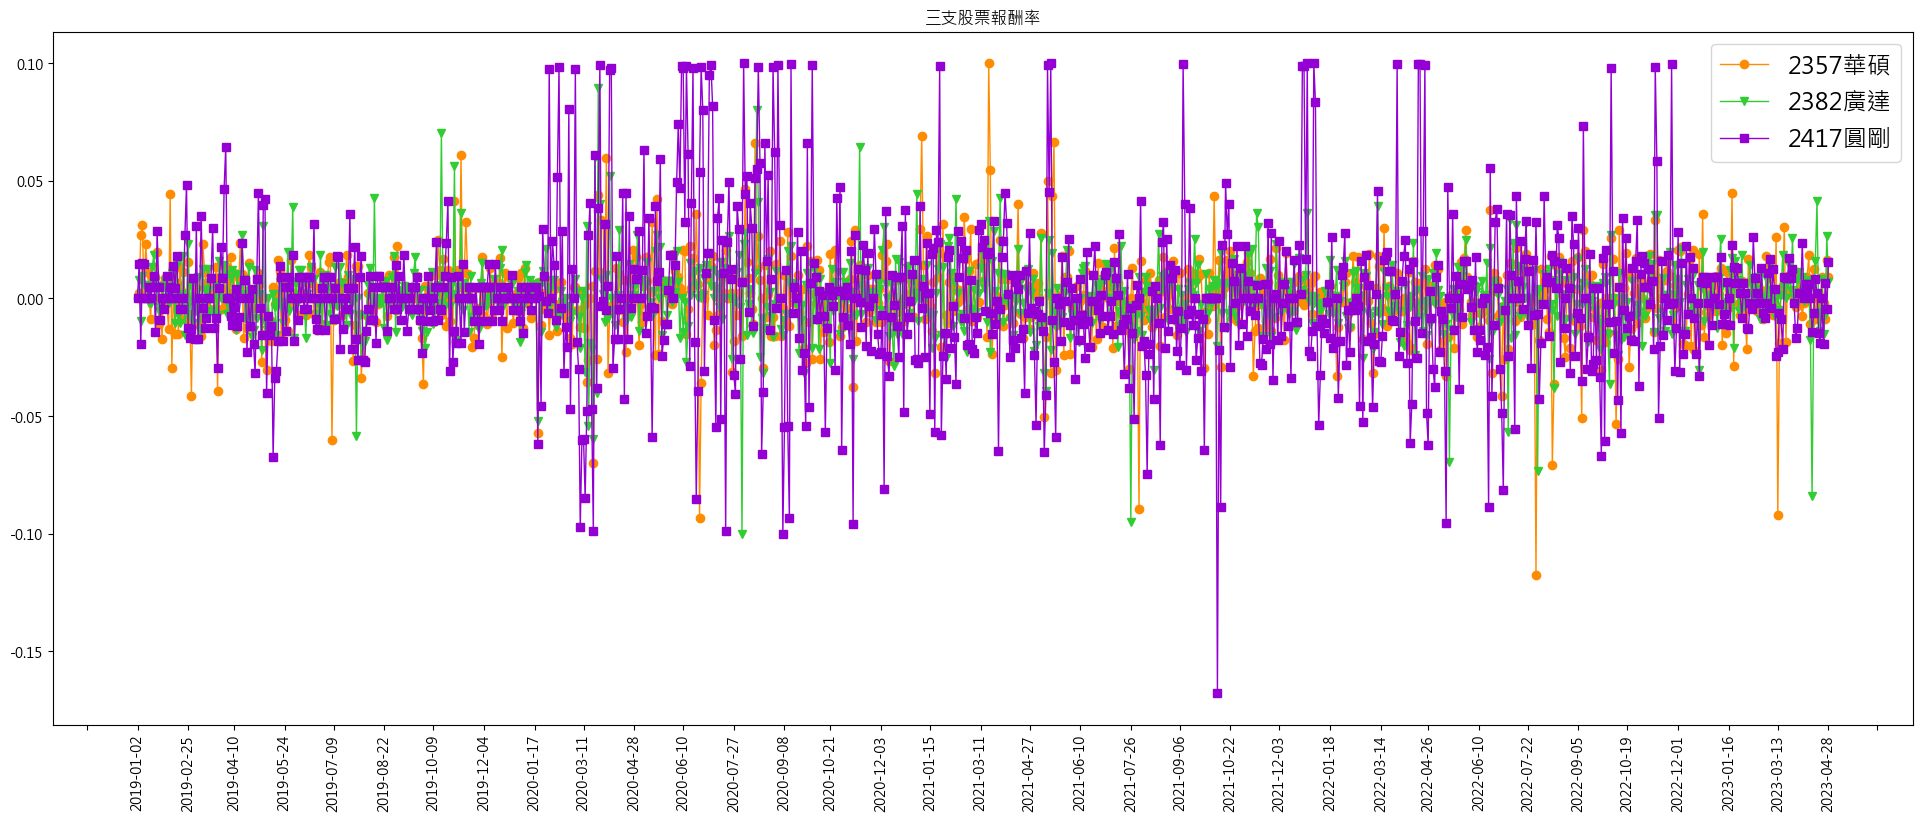

In [57]:
file_csv = pd.read_csv(filepath_or_buffer=f"{os.getcwd()}\\final_csv\\abnormal_return.csv")
df = pd.DataFrame(file_csv)

Lx = df["日期"]
Ly_2357 = df["2357實際報酬率"]
Ly_2382 = df["2382實際報酬率"]
Ly_2417 = df["2417實際報酬率"]

fig = plt.figure(figsize=(24, 9))

plt.plot(Lx, Ly_2357, label="2357華碩", linewidth=1, marker="o", color="darkorange")
plt.plot(Lx, Ly_2382, label="2382廣達", linewidth=1, marker="v", color="limegreen")
plt.plot(Lx, Ly_2417, label="2417圓剛", linewidth=1, marker="s", color="darkviolet")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 設定刻度間隔為1個月
plt.xticks(rotation=90)
plt.title(label="三支股票報酬率")
plt.legend(fontsize="xx-large", loc ="upper right")
plt.show()

三支股票 每日 外資佔比 與 收盤價格 折線圖

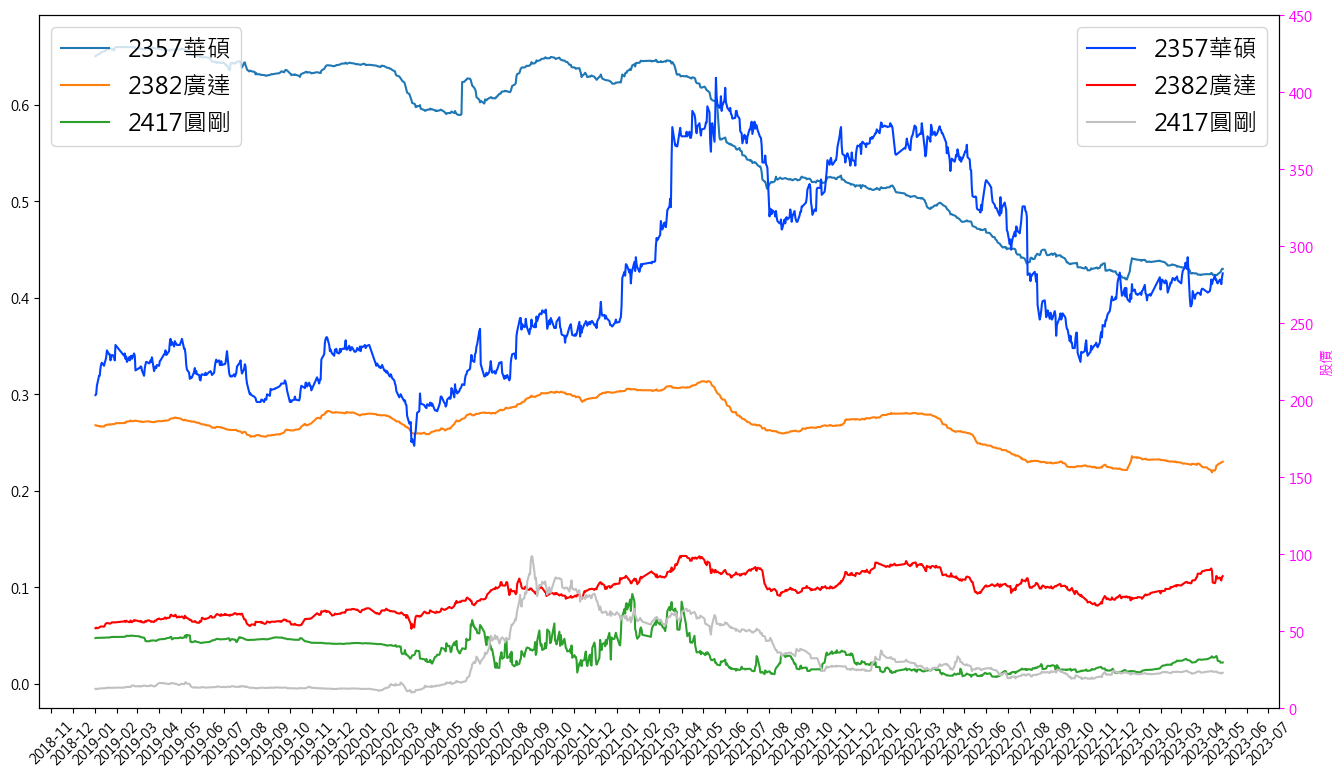

In [58]:
fig, ax1 = plt.subplots(figsize=(16, 9))
plt.xticks(rotation=45)

ax1.plot(df_2357_day_price["日期"], df_2357_day_price["全體外資及陸資持股比率"], label="2357華碩")
ax1.plot(df_2382_day_price["日期"], df_2382_day_price["全體外資及陸資持股比率"], label="2382廣達")
ax1.plot(df_2417_day_price["日期"], df_2417_day_price["全體外資及陸資持股比率"], label="2417圓剛")

ax2 = ax1.twinx()
ax2.plot(df_2357_day_price["日期"], df_2357_day_price["每日收盤價格"], label="2357華碩", color ="#0042ff")
ax2.plot(df_2382_day_price["日期"], df_2382_day_price["每日收盤價格"], label="2382廣達", color="red")
ax2.plot(df_2417_day_price["日期"], df_2417_day_price["每日收盤價格"], label="2417圓剛", color="silver")
ax2.set_ylim(0,450)
ax2.set_ylabel("股價", color="#ff00ff")
ax2.tick_params("y", colors="#ff00ff")

ax1.legend(fontsize="xx-large", loc ="upper left")
ax2.legend(fontsize="xx-large", loc ="upper right")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 設定刻度間隔為1個月
plt.xticks(rotation=45)
plt.legend(fontsize="xx-large")
plt.show()

三支股票的每日收盤價格 折線圖

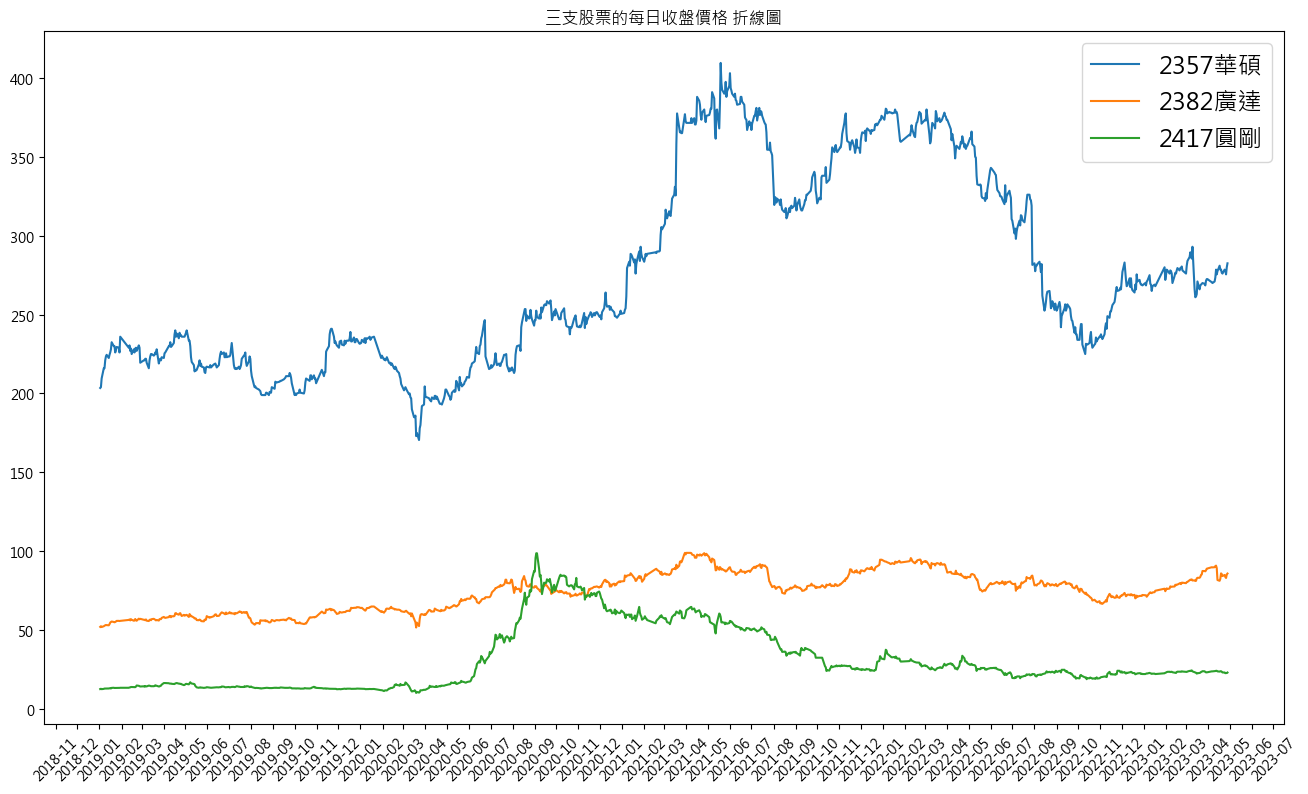

In [59]:
fig = plt.figure(figsize=(16, 9))

# 在每個子圖上繪製折線圖
plt.plot(df_2357_day_price["日期"], df_2357_day_price["每日收盤價格"], label="2357華碩")
plt.plot(df_2382_day_price["日期"], df_2382_day_price["每日收盤價格"], label="2382廣達")
plt.plot(df_2417_day_price["日期"], df_2417_day_price["每日收盤價格"], label="2417圓剛")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # 設定刻度間隔為1個月
plt.xticks(rotation=45)  # x座標名稱轉45度
plt.legend(fontsize="xx-large")  # 設定圖利大小(fontsize)
plt.title(label="三支股票的每日收盤價格 折線圖")
plt.show()

三支股票分別K線圖

In [60]:
def draw_month_candlestick(df):
    id = df["股票代號"][0]  # 股票代號
    fig = plt.figure(figsize=(27, 3))  # 設定圖片比例
    ax = fig.add_subplot(1, 1, 1)  # 設定圖片位置在(1,1,1)
    ax.set_title(label=f"{id}每月K線圖") #  設定圖片標題
    ax.set_xticks([i for i in range(len(df["日期"]))])  # 設定x軸刻度
    ax.set_xticklabels(df["日期"], rotation=90)  # 設定x軸標籤
    ax.set_xlabel(xlabel="日期")  # 設定x軸名稱
    ax.set_ylabel(ylabel="Price")  # 設定y軸名稱
    mpf.candlestick2_ochl(ax, df['每月開盤價格'], df['每月收盤價格'], df['每月最高價格'], df['每月最低價格'], width=0.5, colorup="r", colordown="g", alpha=0.75)
    plt.show()

2357每月K線圖

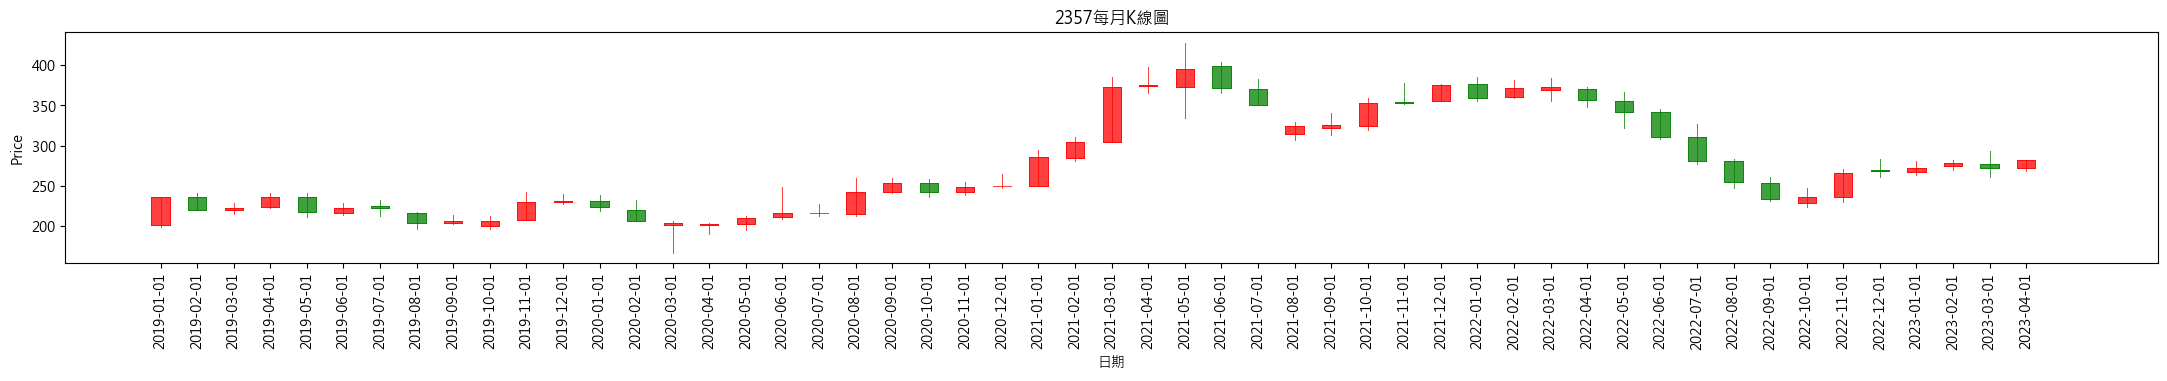

In [61]:
draw_month_candlestick(df_2357_month_price)

2382每月K線圖

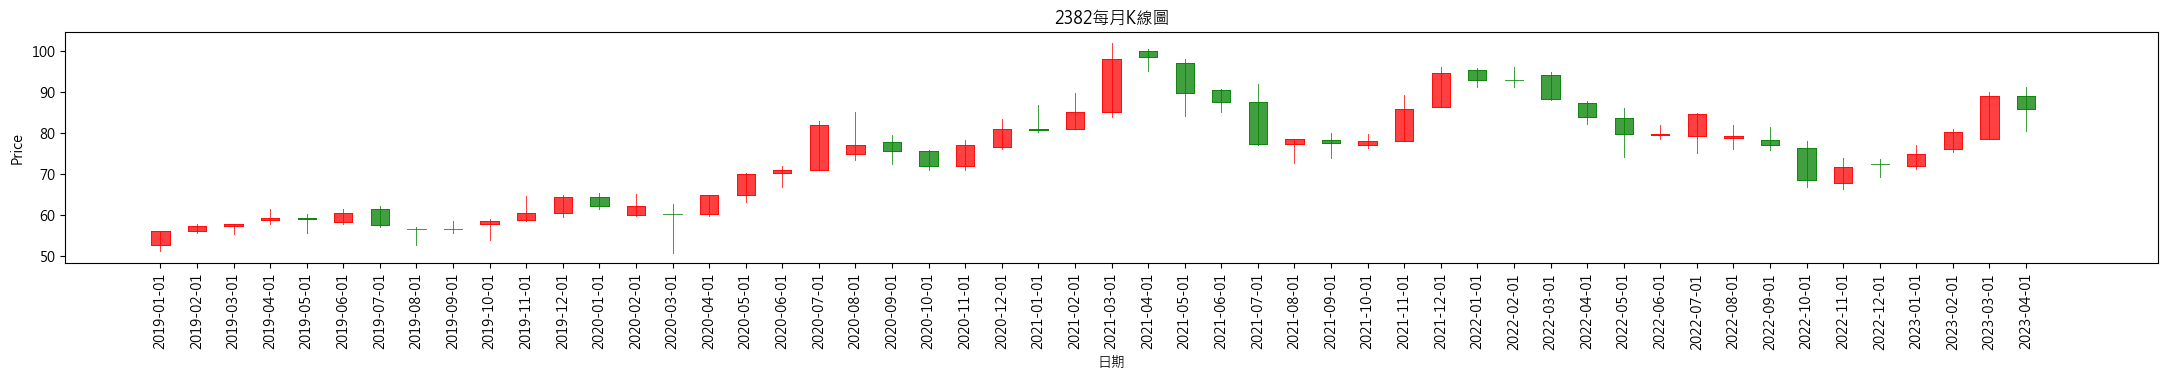

In [62]:
draw_month_candlestick(df_2382_month_price)

2417每月K線圖

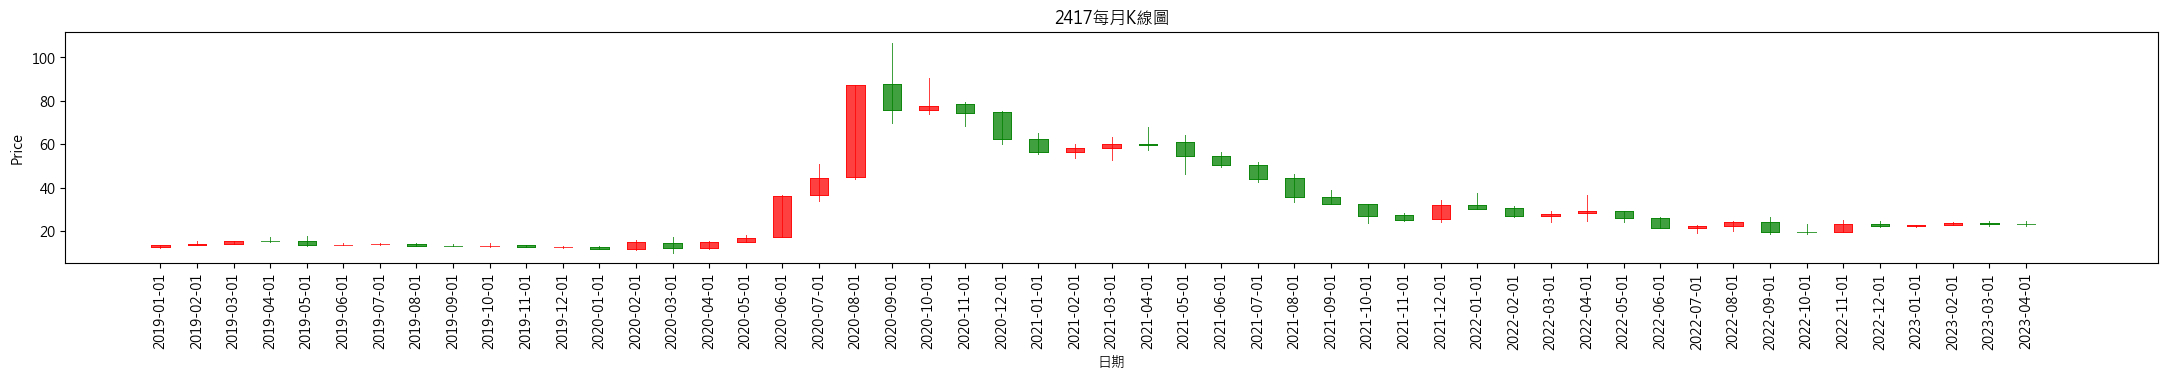

In [63]:
draw_month_candlestick(df_2417_month_price)

三支股票的分別疫情前後收盤價與威廉指數

In [64]:
def find_start_and_end(df, start_date, end_date):
    start_and_end_dates = list()
    for i in range(0,len(df)):
        if str(df["日期"][i]) == start_date:
            start_and_end_dates.append(i)
        elif str(df["日期"][i]) == end_date:
            start_and_end_dates.append(i)
    return start_and_end_dates

def get_William_r_echo(df, day):
    # rolling(window=n)是一種滾動視窗的計算方式，它會在資料序列上移動一個窗口，並對窗口中的數據應用指定的函數（例如最大值、最小值等）
    highest_high = df["每日最高價格"].rolling(window=day).max()  # 計算n日內最高價(window=n天期)
    lowest_low =  df["每日最低價格"].rolling(window=day).min()  # 計算n日內最低價(window=n天期)
    william_r_echo = (highest_high - df["每日收盤價格"]) / (highest_high - lowest_low) * -100  #(n日內最高價-收盤價) / (n日內最高價-n日內最低價)
    return william_r_echo
    
def draw_twin(df, day ,name):
    fig, ax1 = plt.subplots(figsize=(24,4))  # 創建一個包含兩個y軸的圖
    plt.xticks(rotation=45)  # x軸座標名稱轉45度
    # 繪製第一組y軸收盤價(圖的左方)
    ax1.plot(df["日期"], df["每日收盤價格"], linestyle="-", color = "#0042ff", linewidth = 1, label = "收盤價")  # Date設定在x軸，Close設定在y軸(左方)
    ax1.plot(df["日期"], df["MA_5"],color = 'coral', label="5日均線")  # 繪製在第一組y軸的五日均線(圖的左方)
    ax1.plot(df["日期"], df["MA_10"],color = 'forestgreen', label="10日均線")  # 繪製在第一組y軸的十日均線(圖的左方)
    ax1.set_xlabel("時間")  # 設定x軸名稱
    ax1.set_ylabel("收盤價", color="#0042ff")  # 左方y軸名稱設為黑色
    ax1.tick_params("y", colors="black")  # 左方y軸刻度設為黑色

    ax2 = ax1.twinx()  # 創建第二組y軸(看圖的右方y軸)

    ax2.plot(df["日期"], get_William_r_echo(df, day), color = "#ff00ff", label="威廉指數")  # Date設定在x軸，威廉指數設定在y軸(右方)
    ax2.set_ylim(-150, 100)  # 設定右方y軸刻度
    ax2.set_ylabel("威廉指數", color="#ff00ff")  # y軸名稱為#ff00ff色
    ax2.tick_params("y", colors="#ff00ff")  # 左方y軸刻度和名稱設為#ff00ff色

    # 繪製水平線
    plt.axhline(-20,color="silver", linewidth = 3)
    plt.axhline(-80,color="silver",linewidth = 3)

    # 設定圖例
    ax1.legend(fontsize="xx-large", loc="upper left")
    ax2.legend(fontsize="xx-large", loc="upper right")

    #設定圖片標題
    plt.title(f"{name}收盤價、五日均、十日均、威廉指數")

    #show出圖片
    plt.show()    
    
def draw_twin_Willian(df, day , name):
    fig, ax1 = plt.subplots(figsize=(24,4))  # 創建一個包含兩個y軸的圖
    plt.xticks(rotation=45)  # x軸座標名稱轉45度
    #繪製第一組y軸收盤價(圖的左方)
    ax1.plot(df["日期"], df["每日收盤價格"], linestyle="-", color="#0042ff", linewidth=1, label="收盤價")#Date設定在x軸，Close設定在y軸(左方)
    ax1.set_xlabel("時間")  # 設定x軸名稱
    ax1.set_ylabel("收盤價", color="#0042ff")  #左方y軸名稱設為黑色
    ax1.tick_params("y", colors="black")  # 左方y軸刻度設為黑色
    

    ax2 = ax1.twinx()#創建第二組y軸(看圖的右方y軸)

    ax2.plot(df["日期"], get_William_r_echo(df, day), color="#ff00ff", label="威廉指數")  # Date設定在x軸，威廉指數設定在y軸(右方)
    ax2.set_ylim(-150, 100)  # 設定右方y軸刻度
    ax2.set_ylabel("威廉指數", color="#ff00ff")  # y軸名稱為#ff00ff色
    ax2.tick_params("y", colors="#ff00ff")  # 左方y軸刻度和名稱設為#ff00ff色

    #繪製水平線
    plt.axhline(-20, color="silver", linewidth=3)
    plt.axhline(-80, color="silver",linewidth=3)

    # 設定圖例
    ax1.legend(fontsize="xx-large", loc="upper left")
    ax2.legend(fontsize="xx-large", loc="upper right")

    #設定圖片標題
    plt.title(f"{name}收盤價與威廉指數") 

    #show出圖片
    plt.show()
    
def draw_twin_MA(df ,name):
    fig, ax1 = plt.subplots(figsize=(24,4))#創建一個包含兩個y軸的圖
    plt.xticks(rotation=45)#x軸座標名稱轉45度
    #繪製第一組y軸收盤價(圖的左方)
    ax1.plot(df["日期"], df["每日收盤價格"], linestyle="-", color = '#0042ff', linewidth = 1, label = '收盤價')#Date設定在x軸，Close設定在y軸(左方)
    ax1.plot(df["日期"], df["MA_5"], color = 'coral', label='5日均線')#繪製在第一組y軸的五日均線(圖的左方)
    ax1.plot(df["日期"], df["MA_10"], color = 'forestgreen', label='10日均線')#繪製在第一組y軸的十日均線(圖的左方)
    ax1.set_xlabel('時間')#設定x軸名稱
    ax1.set_ylabel('收盤價', color='#0042ff')#左方y軸名稱設為黑色
    ax1.tick_params('y', colors='black')#左方y軸刻度設為黑色

    ax1.legend(fontsize='xx-large', loc ='upper left')

    #設定圖片標題
    plt.title(f"{name}收盤價與均線") 

    #show出圖片
    plt.show() 

2357疫情前收盤價與威廉指數

In [65]:
df, start_date, end_date = df_2357_day_price, "2020-03-02", "2020-04-30"  # 選定要的區間
start_and_end_dates = find_start_and_end(df, start_date, end_date)  # 找出日期始末的index值

df_before = df.iloc[start_and_end_dates[0]: start_and_end_dates[1]]  # 把該區間的資料取出

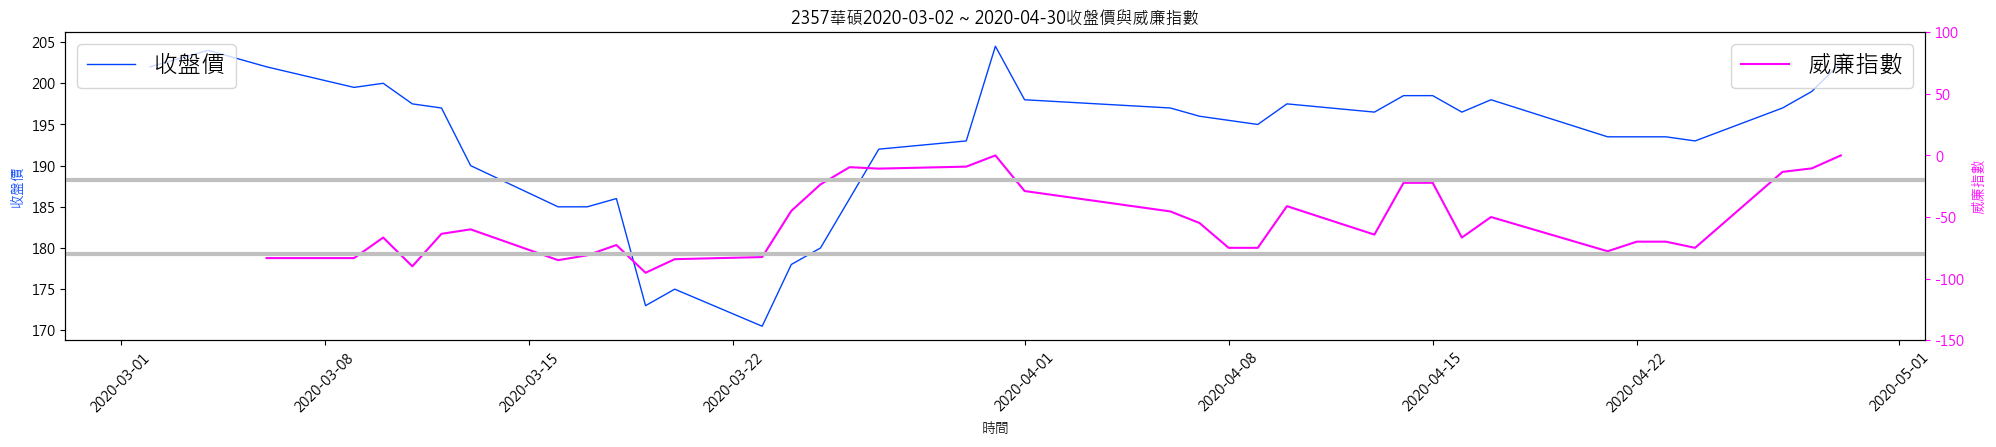

In [66]:
draw_twin_Willian(df_before, day=5, name='2357華碩'+start_date+' ~ '+end_date)

C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\3025322720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['MA_5'] = df_before['每日收盤價格'].rolling(window=5).mean()#將5日均線的值加入到df中
C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\3025322720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['MA_10'] = df_before['每日收盤價格'].rolling(window=10).mean()#將10日均線的值加入到df中


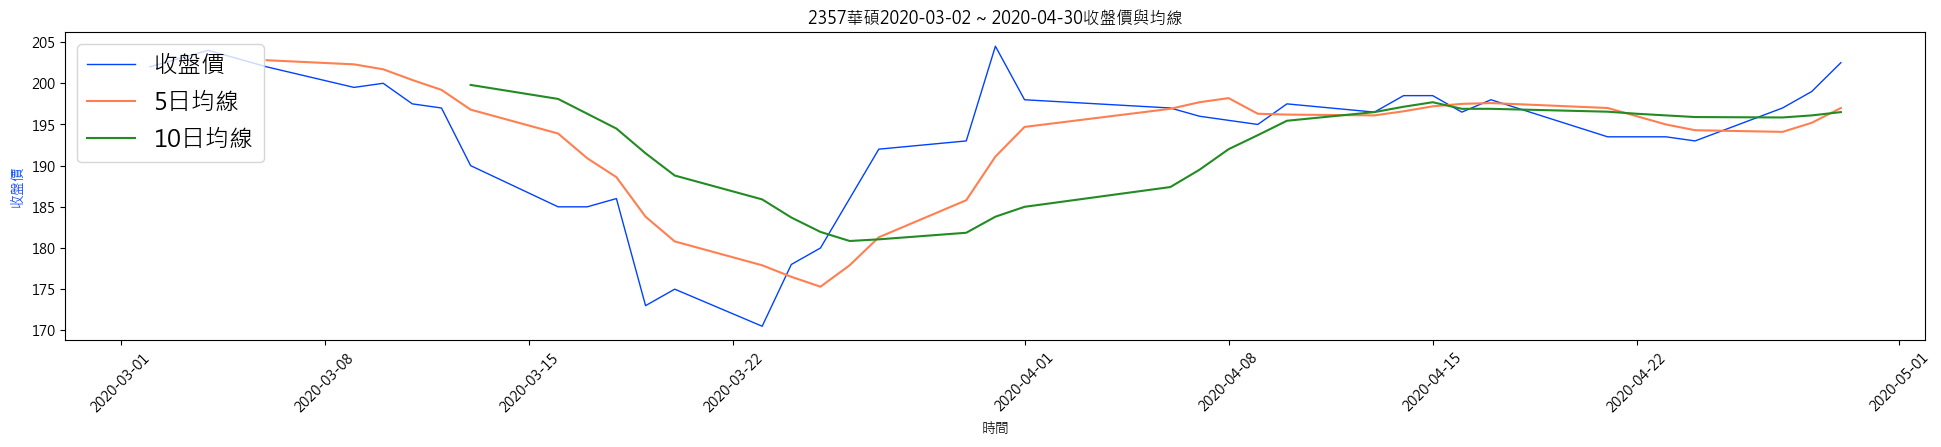

In [67]:
#rolling(window=n)是一種滾動視窗的計算方式，它會在資料序列上移動一個窗口，並對窗口中的數據應用指定的函數（例如最大值、最小值等）
df_before['MA_5'] = df_before['每日收盤價格'].rolling(window=5).mean()#將5日均線的值加入到df中
df_before['MA_10'] = df_before['每日收盤價格'].rolling(window=10).mean()#將10日均線的值加入到df中

draw_twin_MA(df_before, name='2357華碩'+start_date+' ~ '+end_date)

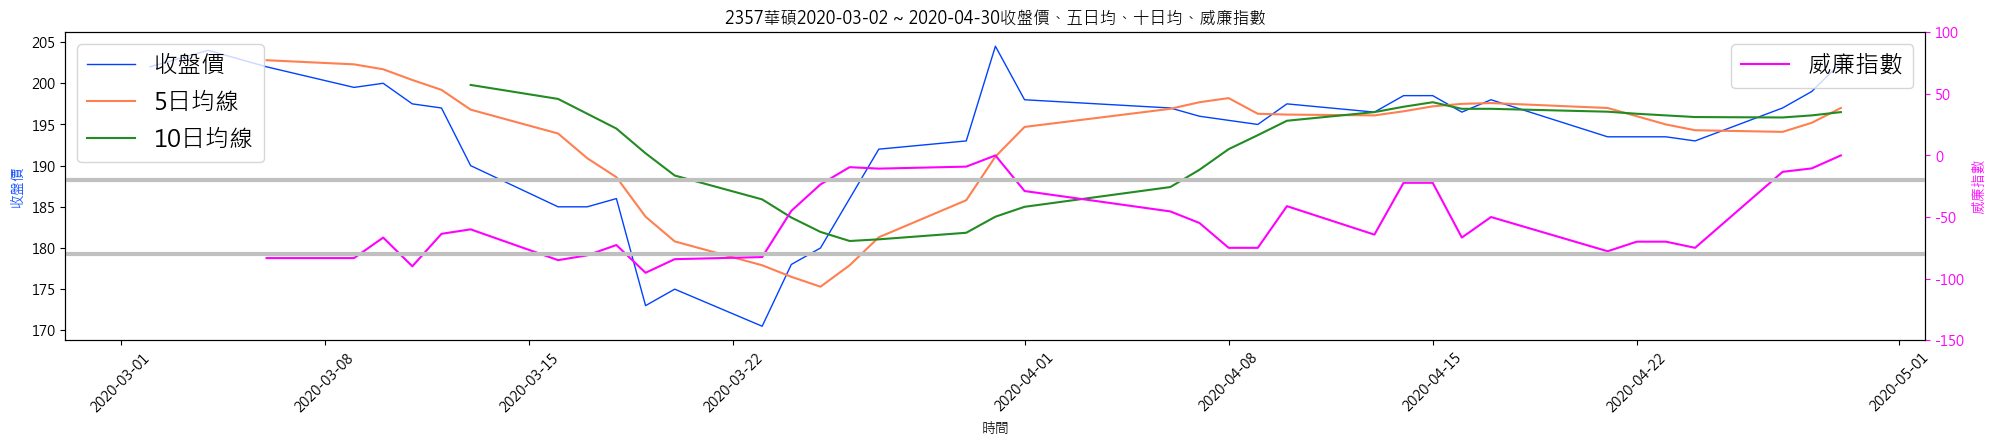

In [68]:
draw_twin(df_before, 5, name='2357華碩'+start_date+' ~ '+end_date)

2382疫情前收盤價與威廉指數

In [69]:
df, start_date, end_date = df_2382_day_price, "2020-03-02", "2020-04-30"  # 選定要的區間
start_and_end_dates = find_start_and_end(df, start_date, end_date)  # 找出日期始末的index值

df_before = df.iloc[start_and_end_dates[0]: start_and_end_dates[1]]  # 把該區間的資料取出

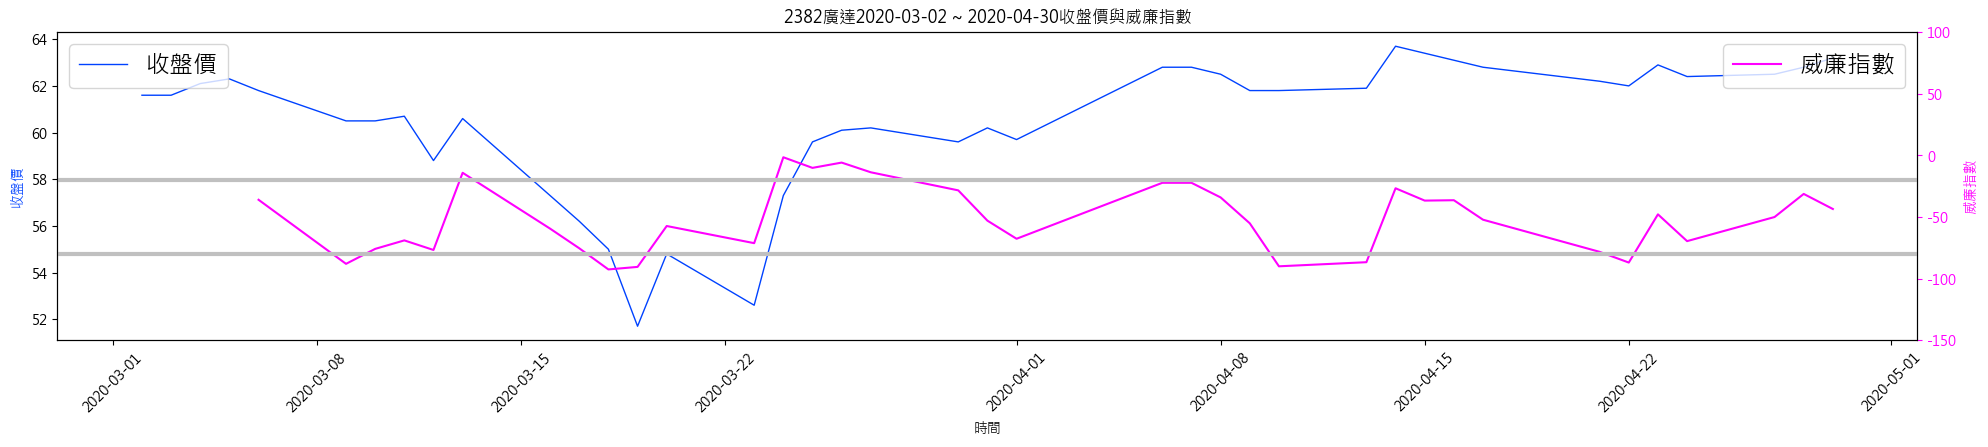

In [70]:
draw_twin_Willian(df_before, day=5, name='2382廣達'+start_date+' ~ '+end_date)

C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\357083588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['MA_5'] = df_before['每日收盤價格'].rolling(window=5).mean()#將5日均線的值加入到df中
C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\357083588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['MA_10'] = df_before['每日收盤價格'].rolling(window=10).mean()#將10日均線的值加入到df中


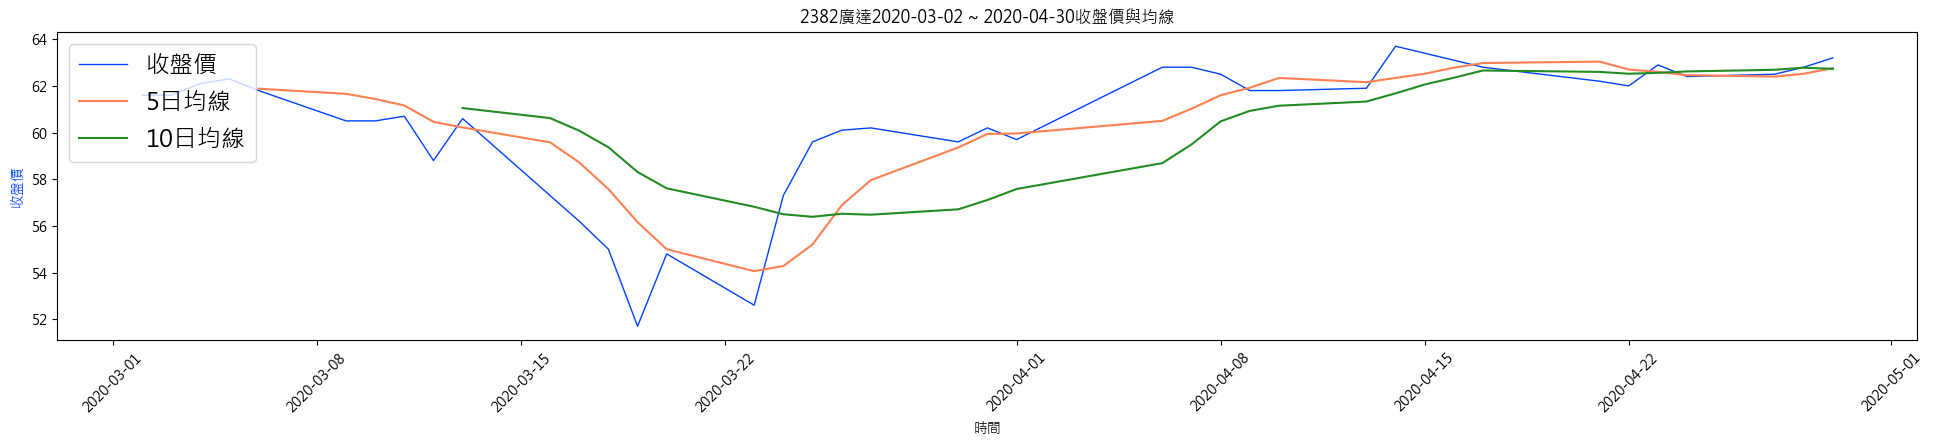

In [71]:
#rolling(window=n)是一種滾動視窗的計算方式，它會在資料序列上移動一個窗口，並對窗口中的數據應用指定的函數（例如最大值、最小值等）
df_before['MA_5'] = df_before['每日收盤價格'].rolling(window=5).mean()#將5日均線的值加入到df中
df_before['MA_10'] = df_before['每日收盤價格'].rolling(window=10).mean()#將10日均線的值加入到df中

draw_twin_MA(df_before, name='2382廣達'+start_date+' ~ '+end_date )

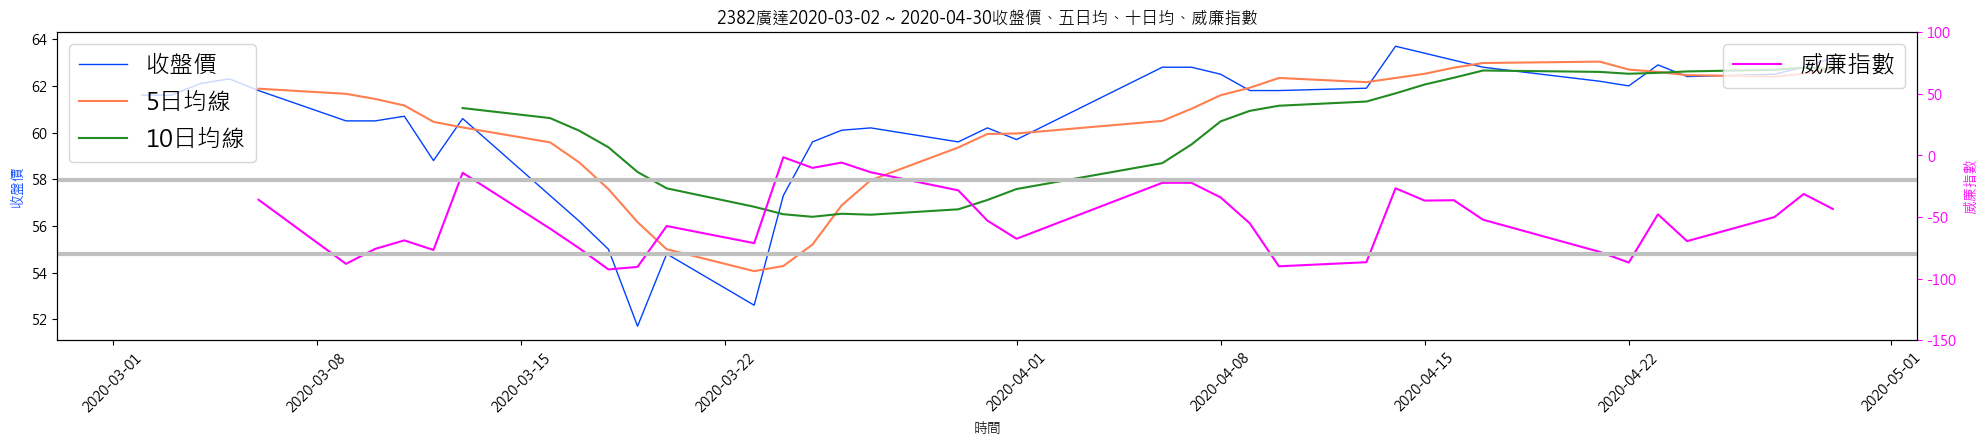

In [72]:
draw_twin(df_before, 5, name='2382廣達'+start_date+' ~ '+end_date)

2417疫情前收盤價與威廉指數

In [73]:
df, start_date, end_date = df_2417_day_price, "2020-03-02", "2020-04-30"  # 選定要的區間
start_and_end_dates = find_start_and_end(df, start_date, end_date)  # 找出日期始末的index值

df_before = df.iloc[start_and_end_dates[0]: start_and_end_dates[1]]  # 把該區間的資料取出

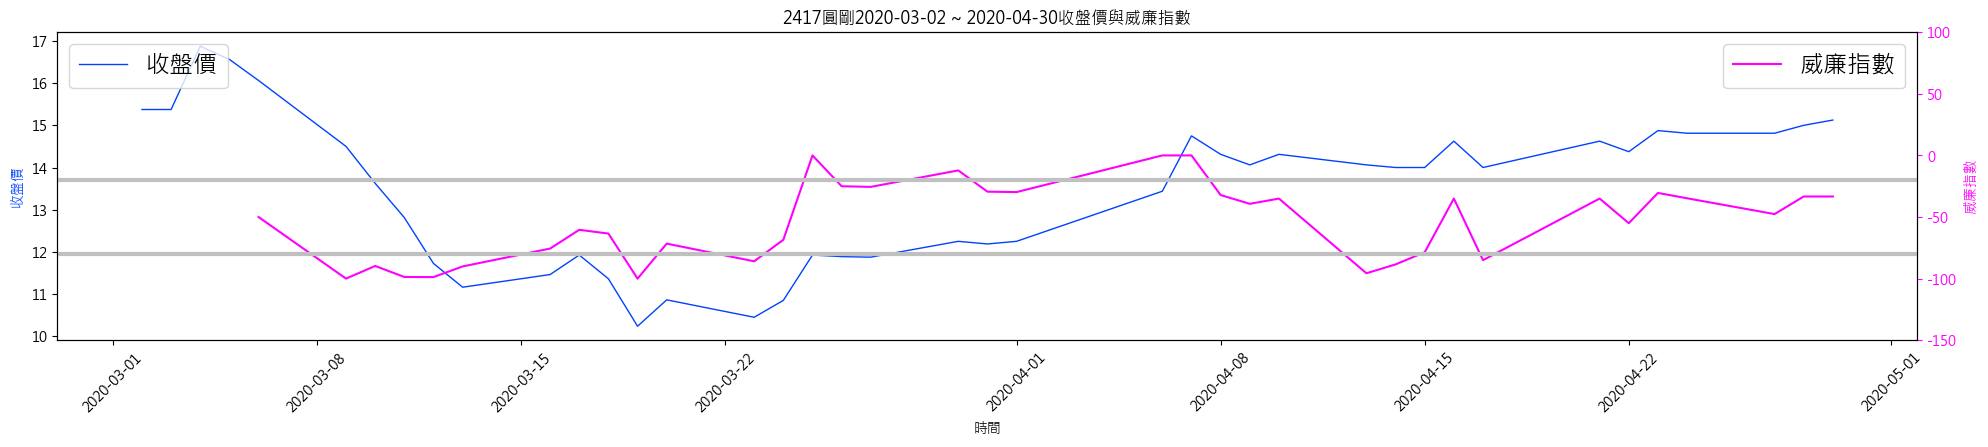

In [74]:
draw_twin_Willian(df_before, day=5, name='2417圓剛'+start_date+' ~ '+end_date)

C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\2891124030.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['MA_5'] = df_before['每日收盤價格'].rolling(window=5).mean()#將5日均線的值加入到df中
C:\Users\stomachache\AppData\Local\Temp\ipykernel_13320\2891124030.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before['MA_10'] = df_before['每日收盤價格'].rolling(window=10).mean()#將10日均線的值加入到df中


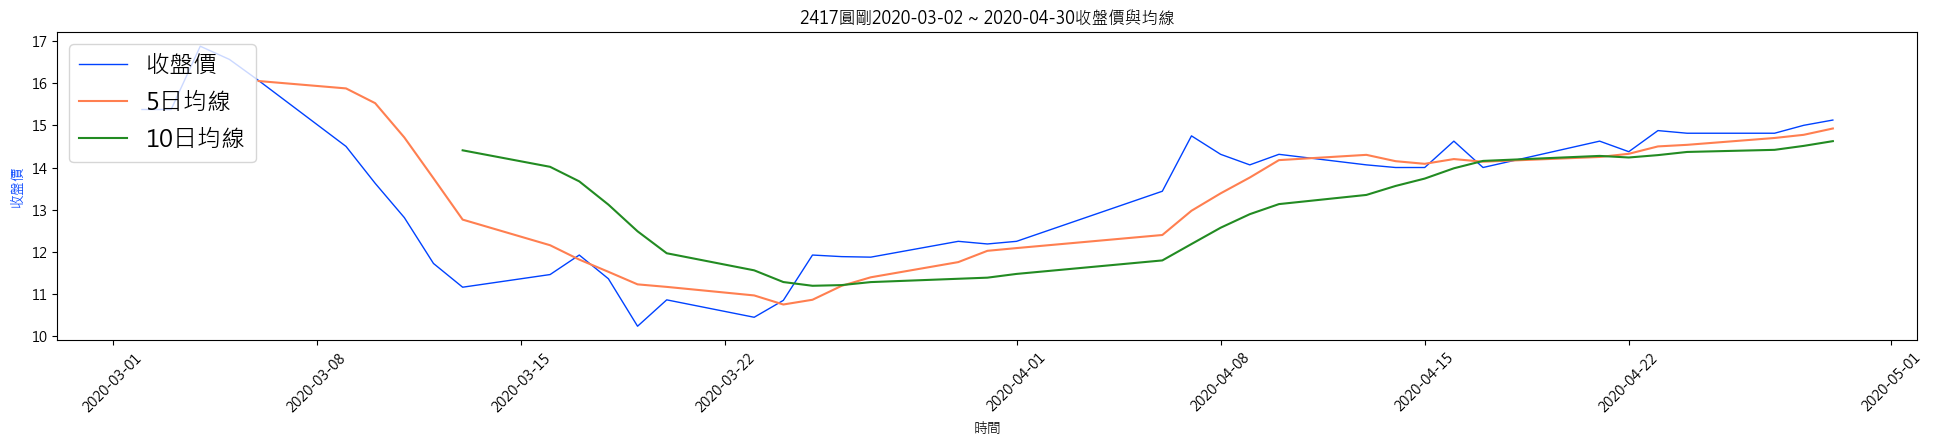

In [75]:
#rolling(window=n)是一種滾動視窗的計算方式，它會在資料序列上移動一個窗口，並對窗口中的數據應用指定的函數（例如最大值、最小值等）
df_before['MA_5'] = df_before['每日收盤價格'].rolling(window=5).mean()#將5日均線的值加入到df中
df_before['MA_10'] = df_before['每日收盤價格'].rolling(window=10).mean()#將10日均線的值加入到df中

draw_twin_MA(df_before, name='2417圓剛'+start_date+' ~ '+end_date )

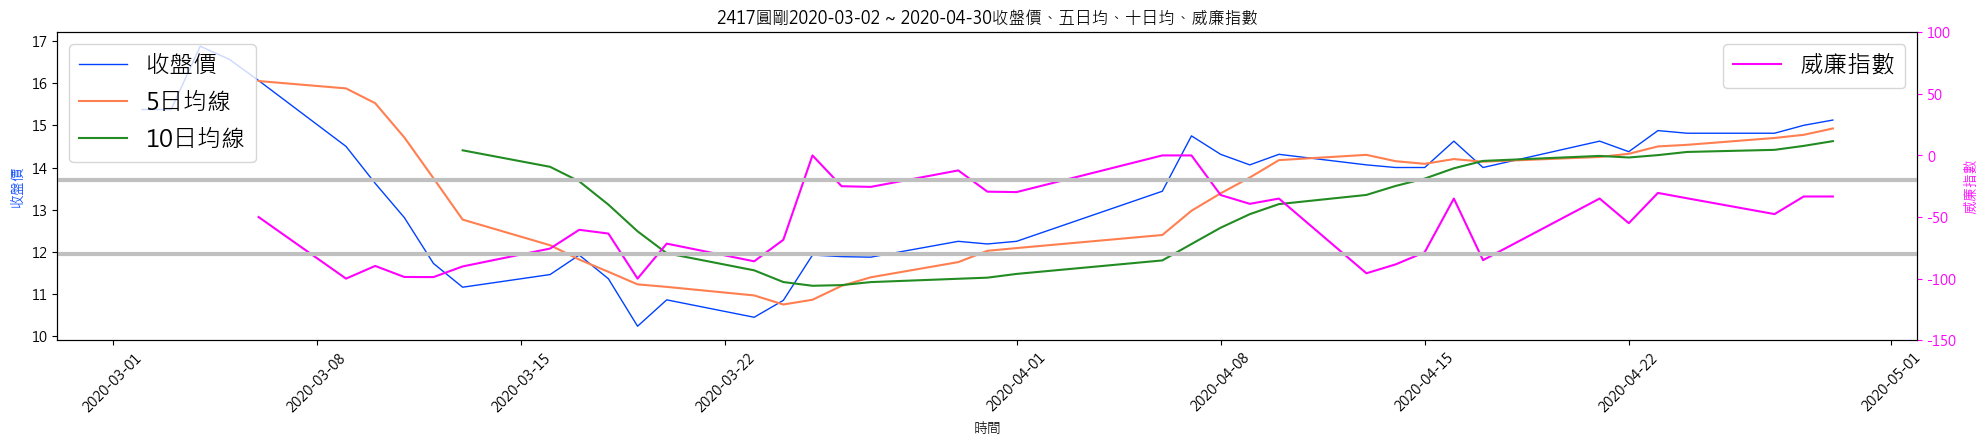

In [76]:
draw_twin(df_before, 5, name='2417圓剛'+start_date+' ~ '+end_date)

三支股票全體外資及陸資持股比率

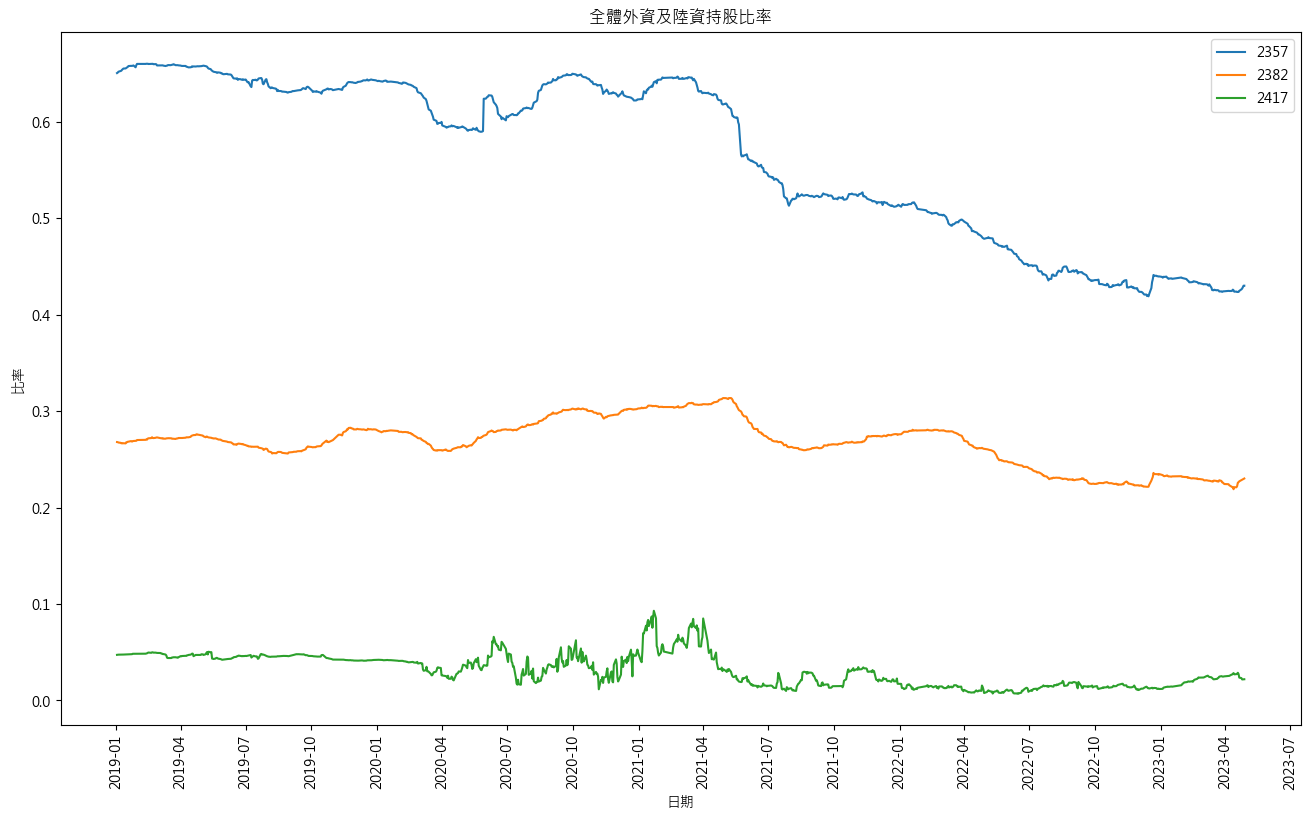

In [77]:
Lx = df_2357_day_price["日期"]
Ly1 = df_2357_day_price["全體外資及陸資持股比率"]
Ly2 = df_2382_day_price["全體外資及陸資持股比率"]
Ly3 = df_2417_day_price["全體外資及陸資持股比率"]

fig = plt.figure(figsize=(16, 9))
plt.plot(Lx, Ly1, label=df_2357_day_price["股票代號"][0])
plt.plot(Lx, Ly2, label=df_2382_day_price["股票代號"][0])
plt.plot(Lx, Ly3, label=df_2417_day_price["股票代號"][0])
plt.xticks(Lx, rotation = 90)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # 設定刻度間隔為1個月
plt.xlabel("日期")
plt.ylabel("比率")
plt.title("全體外資及陸資持股比率")
plt.legend(loc="upper right")

三支股票分別的外資佔比+超常報酬率

In [78]:
df_abn_return = pd.DataFrame()

df_abn_return["日期"] = df_index_and_risk_free["日期"]
df_abn_return["無風險利率"] = df_index_and_risk_free["無風險利率"]
df_abn_return["市場報酬率"] = df_index_and_risk_free["市場報酬率"]
df_abn_return["2357收盤價"] = df_2357_day_price["每日收盤價格"]
df_abn_return["2382收盤價"] = df_2382_day_price["每日收盤價格"]
df_abn_return["2417收盤價"] = df_2417_day_price["每日收盤價格"]

L = [0]
prices = df_abn_return["2357收盤價"]
for i in range(1, len(prices)):
    L.append((prices[i] - prices[i - 1]) / prices[i - 1])

df_abn_return["2357實際報酬率"] = L

L = [0]
prices = df_abn_return["2382收盤價"]
for i in range(1, len(prices)):
    L.append((prices[i] - prices[i - 1]) / prices[i - 1])

df_abn_return["2382實際報酬率"] = L

L = [0]
prices = df_abn_return["2417收盤價"]
for i in range(1, len(prices)):
    L.append((prices[i] - prices[i - 1]) / prices[i - 1])

df_abn_return["2417實際報酬率"] = L

x = df_abn_return["2357實際報酬率"]
y = df_abn_return["市場報酬率"]
beta_2357 = statistics.covariance(x, y) / statistics.variance(y)
beta_2357

x = df_abn_return["2382實際報酬率"]
y = df_abn_return["市場報酬率"]
beta_2382 = statistics.covariance(x, y) / statistics.variance(y)
beta_2382

x = df_abn_return["2417實際報酬率"]
y = df_abn_return["市場報酬率"]
beta_2417 = statistics.covariance(x, y) / statistics.variance(y)
beta_2417

L = [(df_abn_return["2357實際報酬率"][i] - (df_abn_return["無風險利率"][i] + (df_abn_return["市場報酬率"][i] - df_abn_return["無風險利率"][i]) * beta_2357)) for i in range(df_abn_return.shape[0])]
df_abn_return["2357超常報酬率"] = L

L = [(df_abn_return["2382實際報酬率"][i] - (df_abn_return["無風險利率"][i] + (df_abn_return["市場報酬率"][i] - df_abn_return["無風險利率"][i]) * beta_2382)) for i in range(df_abn_return.shape[0])]
df_abn_return["2382超常報酬率"] = L

L = [(df_abn_return["2417實際報酬率"][i] - (df_abn_return["無風險利率"][i] + (df_abn_return["市場報酬率"][i] - df_abn_return["無風險利率"][i]) * beta_2417)) for i in range(df_abn_return.shape[0])]
df_abn_return["2417超常報酬率"] = L

df_abn_return

,日期,無風險利率,市場報酬率,2357收盤價,2382收盤價,2417收盤價,2357實際報酬率,2382實際報酬率,2417實際報酬率,2357超常報酬率,2382超常報酬率,2417超常報酬率
0,2019-01-02,0.01300,-0.0178,203.5,52.099998,12.687500,0.000000,0.000000,0.000000,0.006644,0.009177,0.018182
1,2019-01-03,0.01300,-0.0065,204.0,52.500000,12.875000,0.002457,0.007678,0.014778,0.001894,0.008718,0.021520
2,2019-01-04,0.01300,-0.0116,209.5,52.000000,12.625000,0.026961,-0.009524,-0.019417,0.029650,-0.004811,-0.007512
3,2019-01-07,0.01330,0.0221,216.0,52.500000,12.812500,0.031026,0.009615,0.014851,0.012114,-0.010021,-0.007358
4,2019-01-08,0.01340,-0.0028,216.0,52.799999,13.000000,0.000000,0.005714,0.014634,-0.003068,0.003979,0.017635
...,...,...,...,...,...,...,...,...,...,...,...,...
1031,2023-04-24,0.01555,0.0015,278.5,85.000000,23.200001,0.009058,0.008304,0.000000,0.002469,0.002870,-0.001326
1032,2023-04-25,0.01555,-0.0164,278.0,83.699997,22.750000,-0.001795,-0.015294,-0.019397,0.003032,-0.007839,-0.002600
1033,2023-04-26,0.01595,0.0003,275.5,83.099998,22.900000,-0.008993,-0.007168,0.006593,-0.014961,-0.011850,0.006488
1034,2023-04-27,0.01585,0.0024,280.0,85.300003,22.799999,0.016334,0.026474,-0.004367,0.009062,0.020308,-0.006600


2357 外資佔比+超常報酬率

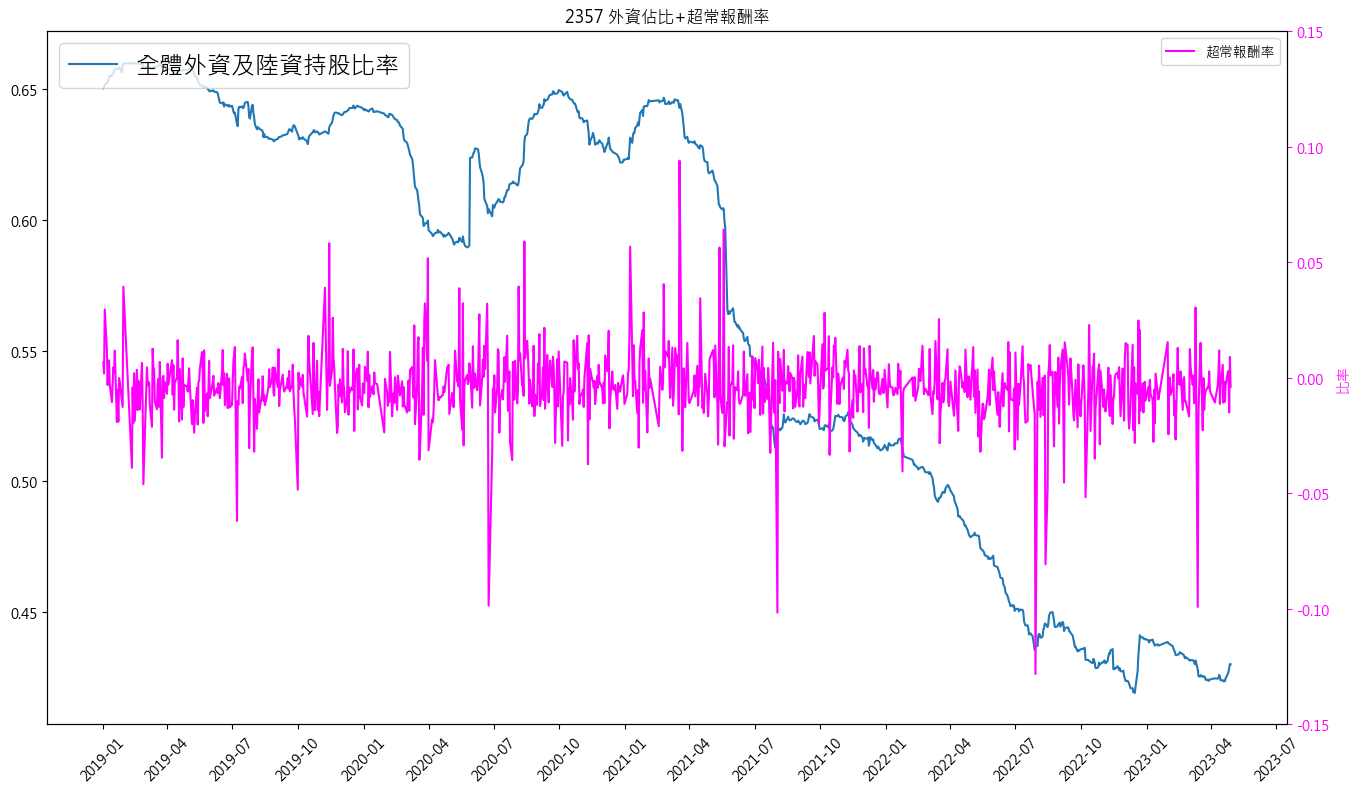

In [79]:
Lx = df_2357_day_price["日期"]
Ly1 = df_2357_day_price["全體外資及陸資持股比率"]
Ly2 = df_abn_return["2357超常報酬率"]

fig, ax1 = plt.subplots(figsize=(16,9))
plt.xticks(rotation=45)

ax1.plot(Lx,Ly1, label="全體外資及陸資持股比率")

ax2 = ax1.twinx()
ax2.plot(Lx, Ly2, label="超常報酬率",color='#ff00ff')

ax2.set_ylim(-0.15,0.15)
ax2.set_ylabel('比率', color='#ff00ff')
ax2.tick_params('y', colors='#ff00ff')

ax1.legend(fontsize='xx-large', loc ='upper left')
ax2.legend(fontsize='xx-large', loc ='upper right')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.title("2357 外資佔比+超常報酬率")
plt.legend(loc="upper right")

2382 外資佔比+超常報酬率

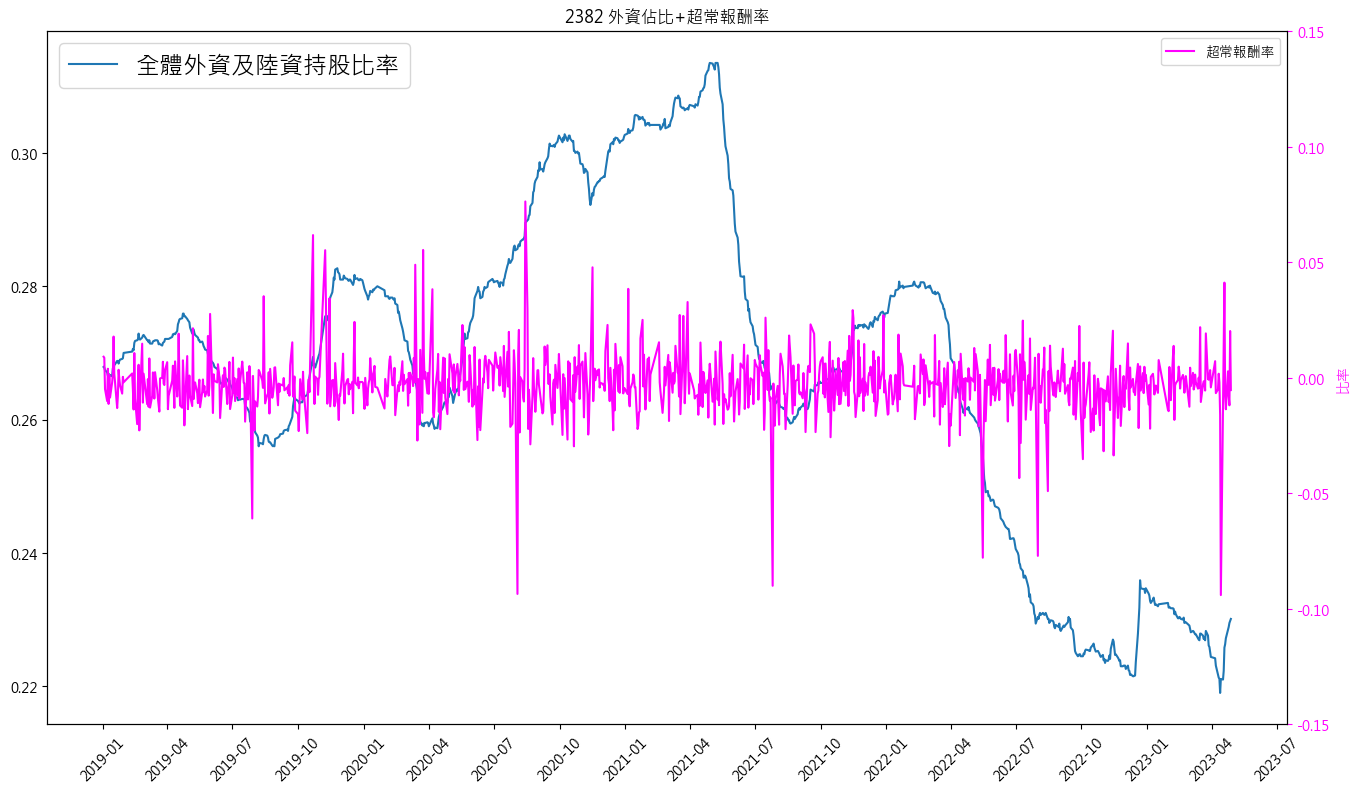

In [80]:
Lx = df_2382_day_price["日期"]
Ly1 = df_2382_day_price["全體外資及陸資持股比率"]
Ly2 = df_abn_return["2382超常報酬率"]

fig, ax1 = plt.subplots(figsize=(16,9))
plt.xticks(rotation=45)

ax1.plot(Lx,Ly1, label="全體外資及陸資持股比率")

ax2 = ax1.twinx()
ax2.plot(Lx, Ly2, label="超常報酬率",color='#ff00ff')

ax2.set_ylim(-0.15,0.15)
ax2.set_ylabel('比率', color='#ff00ff')
ax2.tick_params('y', colors='#ff00ff')

ax1.legend(fontsize='xx-large', loc ='upper left')
ax2.legend(fontsize='xx-large', loc ='upper right')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.title("2382 外資佔比+超常報酬率")
plt.legend(loc="upper right")

2417 外資佔比+超常報酬率

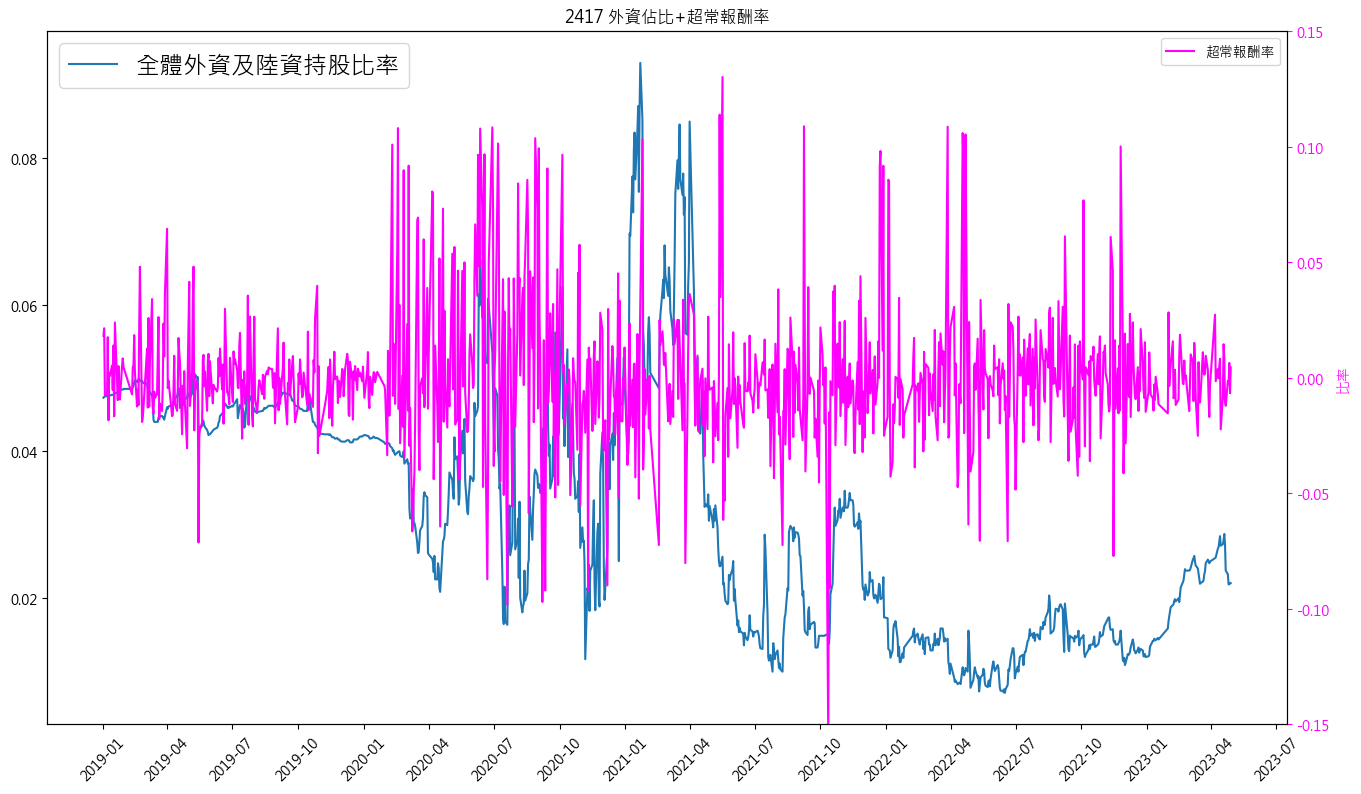

In [81]:
Lx = df_2417_day_price["日期"]
Ly1 = df_2417_day_price["全體外資及陸資持股比率"]
Ly2 = df_abn_return["2417超常報酬率"]

fig, ax1 = plt.subplots(figsize=(16,9))
plt.xticks(rotation=45)

ax1.plot(Lx,Ly1, label="全體外資及陸資持股比率")

ax2 = ax1.twinx()
ax2.plot(Lx, Ly2, label="超常報酬率",color='#ff00ff')

ax2.set_ylim(-0.15,0.15)
ax2.set_ylabel('比率', color='#ff00ff')
ax2.tick_params('y', colors='#ff00ff')

ax1.legend(fontsize='xx-large', loc ='upper left')
ax2.legend(fontsize='xx-large', loc ='upper right')

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.title("2417 外資佔比+超常報酬率")
plt.legend(loc="upper right")

全體外資及陸資持股比變化率 超常報酬率 相關係數

In [82]:
invest_rates = df_2357_day_price["全體外資及陸資持股比率"]
Lx = [0]
for i in range(1, len(invest_rates)):
    Lx.append((invest_rates[i] - invest_rates[i - 1]) / invest_rates[i - 1])
Ly = df_abn_return["2357超常報酬率"]

statistics.correlation(Lx, Ly)

0.26403629251914246

In [83]:
invest_rates = df_2382_day_price["全體外資及陸資持股比率"]
Lx = [0]
for i in range(1, len(invest_rates)):
    Lx.append((invest_rates[i] - invest_rates[i - 1]) / invest_rates[i - 1])
Ly = df_abn_return["2382超常報酬率"]

statistics.correlation(Lx, Ly)

0.3406000657229739

In [84]:
invest_rates = df_2417_day_price["全體外資及陸資持股比率"]
Lx = [0]
for i in range(1, len(invest_rates)):
    Lx.append((invest_rates[i] - invest_rates[i - 1]) / invest_rates[i - 1])
Ly = df_abn_return["2417超常報酬率"]

statistics.correlation(Lx, Ly)

0.15773846236049202

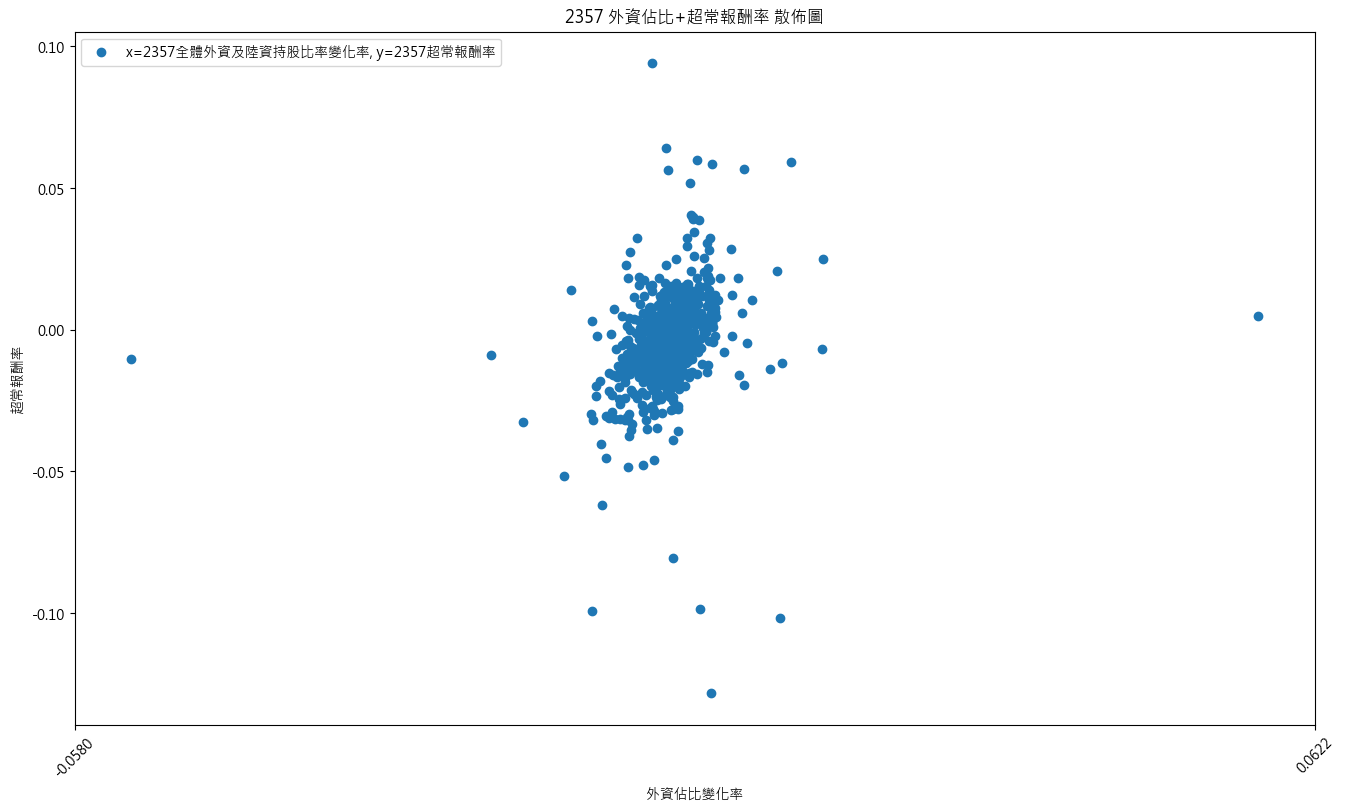

In [85]:
invest_rates = df_2357_day_price["全體外資及陸資持股比率"]
Lx = [0]
for i in range(1, len(invest_rates)):
    Lx.append((invest_rates[i] - invest_rates[i - 1]) / invest_rates[i - 1])

Ly = df_abn_return["2357超常報酬率"]
fig, ax1 = plt.subplots(figsize=(16,9))
plt.xticks(rotation=45)

plt.scatter(Lx, Ly, label="x=2357全體外資及陸資持股比率變化率, y=2357超常報酬率")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.title("2357 外資佔比+超常報酬率 散佈圖")
plt.legend(loc="upper left")

plt.xlabel(xlabel="外資佔比變化率")
plt.ylabel(ylabel="超常報酬率")

plt.show()

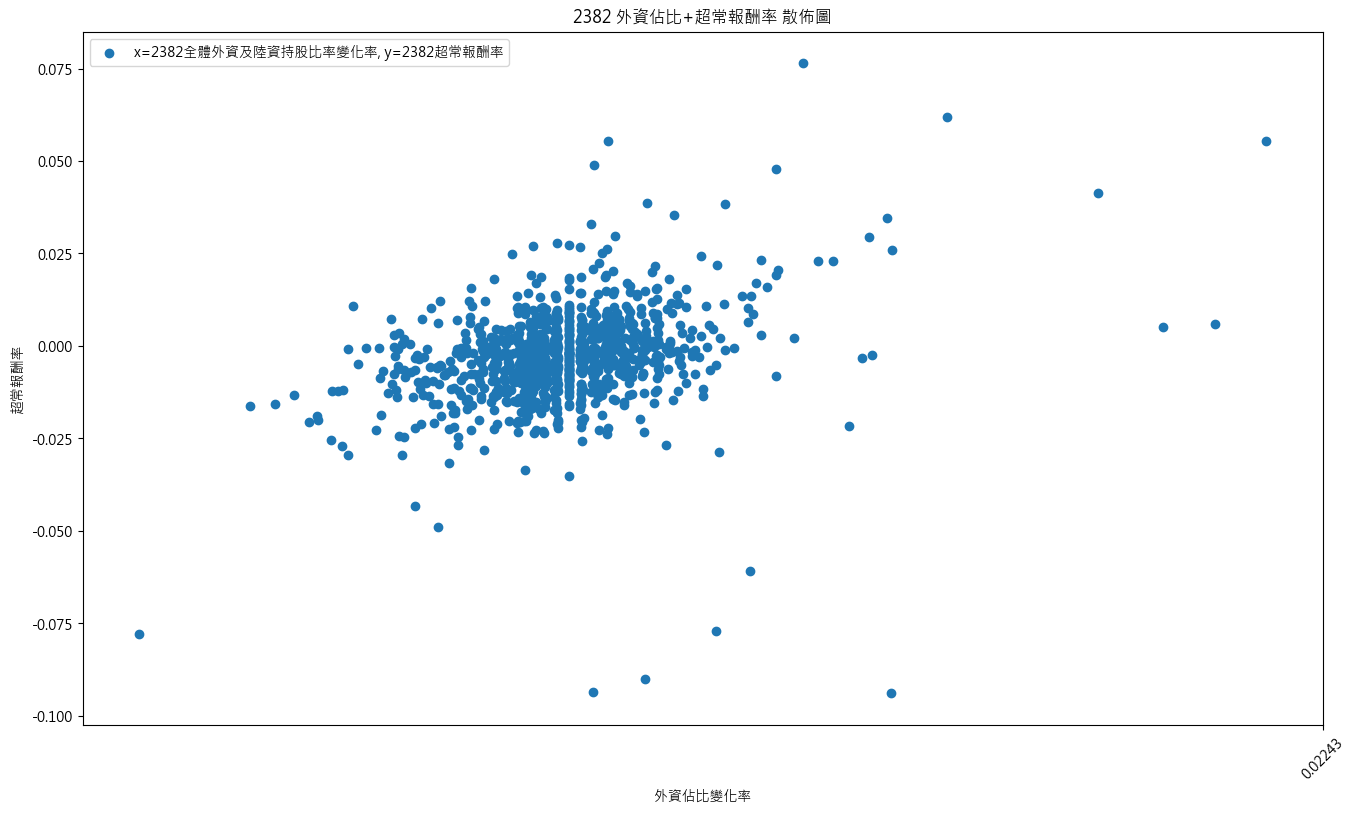

In [86]:
invest_rates = df_2382_day_price["全體外資及陸資持股比率"]
Lx = [0]
for i in range(1, len(invest_rates)):
    Lx.append((invest_rates[i] - invest_rates[i - 1]) / invest_rates[i - 1])

Ly = df_abn_return["2382超常報酬率"]
fig, ax1 = plt.subplots(figsize=(16,9))
plt.xticks(rotation=45)

plt.scatter(Lx, Ly, label="x=2382全體外資及陸資持股比率變化率, y=2382超常報酬率")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.title("2382 外資佔比+超常報酬率 散佈圖")
plt.legend(loc="upper left")

plt.xlabel(xlabel="外資佔比變化率")
plt.ylabel(ylabel="超常報酬率")

plt.show()

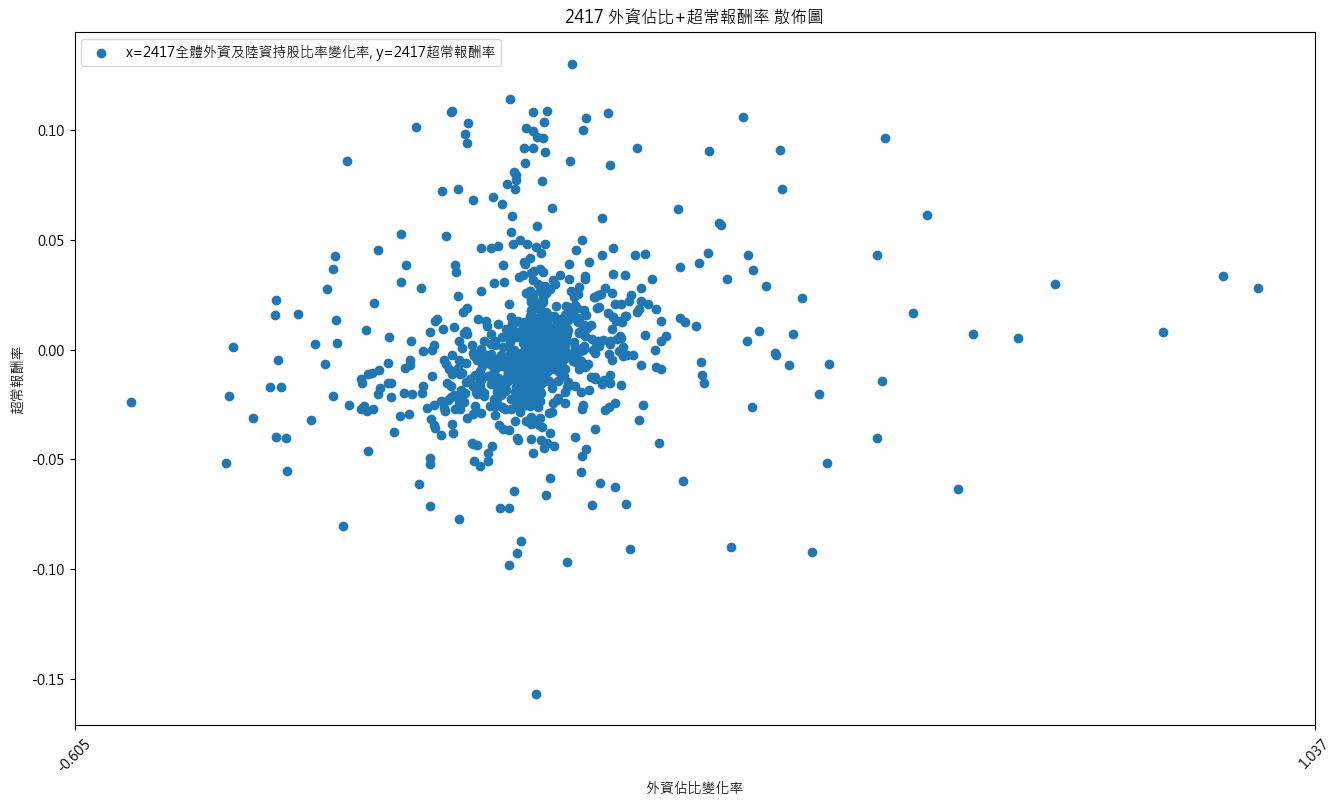

In [87]:
invest_rates = df_2417_day_price["全體外資及陸資持股比率"]
Lx = [0]
for i in range(1, len(invest_rates)):
    Lx.append((invest_rates[i] - invest_rates[i - 1]) / invest_rates[i - 1])

Ly = df_abn_return["2417超常報酬率"]
fig, ax1 = plt.subplots(figsize=(16,9))
plt.xticks(rotation=45)

plt.scatter(Lx, Ly, label="x=2417全體外資及陸資持股比率變化率, y=2417超常報酬率")

plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.title("2417 外資佔比+超常報酬率 散佈圖")
plt.legend(loc="upper left")

plt.xlabel(xlabel="外資佔比變化率")
plt.ylabel(ylabel="超常報酬率")

plt.show()